In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from nilmtk.api import API

In [3]:
from nilmtk.disaggregate import Mean
from nilmtk.disaggregate import CO
from nilmtk.disaggregate import FHMMExact
from nilmtk.disaggregate import Hart85

In [4]:
# from nilmtk_contrib.disaggregate import DAE,Seq2Point, Seq2Seq, RNN, WindowGRU
from nilmtk_contrib.disaggregate import DAE, DSC, AFHMM, AFHMM_SAC, Seq2Point, Seq2Seq, RNN, WindowGRU

Using TensorFlow backend.


In [5]:
redd = {
  'power':
    {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
    },
  'sample_rate': 60,

  'appliances': ['fridge'],
  'methods': {
    
      # 'WindowGRU':WindowGRU({'n_epochs':50,'batch_size':32}),
      # 'RNN':RNN({'n_epochs':50,'batch_size':32}),
      # 'DAE':DAE({'n_epochs':50,'batch_size':32}),
      # 'Seq2Point':Seq2Point({'n_epochs':50,'batch_size':32}),
      # 'AFHMM':AFHMM({'num_of_states':2}),
      # "FHMMExact":FHMMExact({'num_of_states':2}),
      'Seq2Seq':Seq2Seq({'n_epochs':5,'batch_size':32}),
      "CO":CO({}),
      'Mean': Mean({}),
  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
				'buildings': {
				2: {
					'start_time': '2011-04-17',
					'end_time': '2011-04-27'
				},
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
			'buildings': {
				3: {
					'start_time': '2011-04-17',
					'end_time': '2011-04-27'
				},
			}
	}
},
        # 'metrics':['mae']
        'metrics':['rmse']
}
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Generating predictions for : Seq2Seq
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Meange'
............  rmse  ..............
         Seq2Seq          CO       Mean
fridge  61.98916  231.005876  69.905932


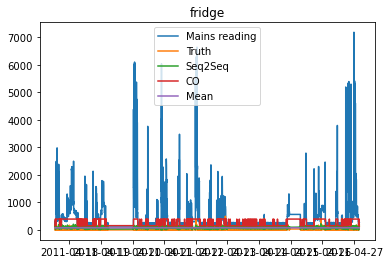

In [6]:
api_res = API(redd)

In [7]:
api_res.errors

[         Seq2Seq          CO       Mean
 fridge  61.98916  231.005876  69.905932]

In [8]:
api_res.errors_keys

['Datport_3_rmse']